1 - Read and Clean the Data

In [1]:
#Import necessary libraries
import pandas as pd

#Read data
data = pd.read_feather(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Sales Data/Sales_data.ftr")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [2]:
#Check for missing values
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [3]:
#Drop missing values
data = data.dropna(how="all")
#Check it now
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [4]:
#Check for duplicates
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [5]:
#Drop duplicates
data = data.drop_duplicates()
#Check it now
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
#Define a function
def return_month(x):
    return x.split("/")[0]

In [7]:
#Apply function to data
data["Month"] = data["Order Date"].apply(return_month)
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [8]:
filter = data["Month"] == "Order Date"
data[filter] #Only one entry 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [9]:
#Leave out this entry
data = data[~filter]

In [10]:
data["Quantity Ordered"] = data["Quantity Ordered"].astype(int)
data["Price Each"] = data["Price Each"].astype(float)

2 - Which Products are Most Often Sold Together

In [11]:
data["Order ID"]

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [14]:
data_duplicated = data[data["Order ID"].duplicated(keep=False)]

In [17]:
group_products = data_duplicated.groupby(["Order ID"])["Product"].apply(lambda x: ",".join(x)).reset_index().rename(columns = {"Product": "Grouped Products"})

In [19]:
new_df = data_duplicated.merge(group_products, how = "left", on = "Order ID")

In [21]:
newer_df = new_df.drop_duplicates(subset=["Order ID"])

Text(0, 0.5, '')

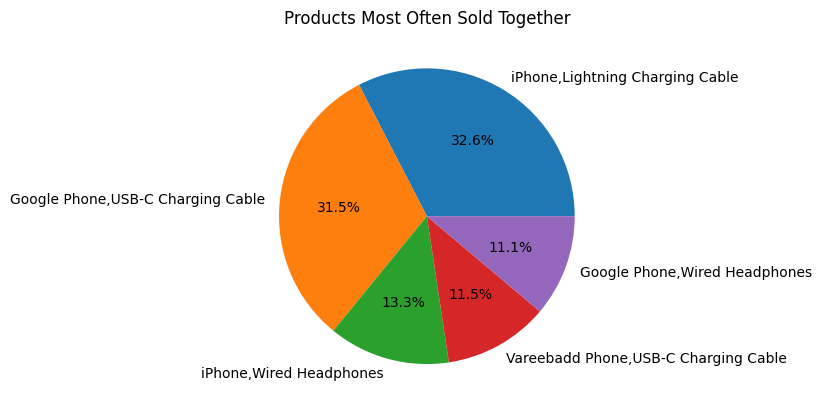

In [29]:
#Plot the data
import matplotlib.pyplot as plt
plt.title("Products Most Often Sold Together")
counts = newer_df["Grouped Products"].value_counts()[0:5]
counts.plot(kind="pie", autopct = "%1.1f%%")
plt.ylabel("")

iPhone and Lightning Charging Cable are most often sold products together.